# Frecuencia de Palabras

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [3]:
# Clase para encontrar palabras comunes en los abstracts
class MostCommonWords:
    def __init__(self, df):
        self.df = df
    
    def find_most_common_words(self, n=1000):
        # Obtener los abstracts como una lista de strings
        abstracts = self.df['Abstract'].tolist()
        
        # Inicializar CountVectorizer
        vectorizer = CountVectorizer()
        
        # Ajustar y transformar los abstracts
        X = vectorizer.fit_transform(abstracts)
        
        # Obtener el vocabulario del CountVectorizer
        vocabulary = vectorizer.get_feature_names_out()
        
        # Obtener las frecuencias de las palabras
        word_frequencies = zip(vocabulary, X.sum(axis=0).tolist()[0])
        
        # Ordenar las palabras por frecuencia
        sorted_words = sorted(word_frequencies, key=lambda x: x[1], reverse=True)
        
        # Obtener las palabras más comunes
        most_common_words = sorted_words[:n]
        
        return most_common_words

In [4]:
# Cargar el DataFrame df_definitivo desde el archivo CSV
df_definitivo = pd.read_csv('ComputationalFinance_def.csv')

# Crear una instancia de la clase MostCommonWords
most_common_analyzer = MostCommonWords(df_definitivo)

In [5]:
# Encontrar las palabras más comunes
most_common_words = most_common_analyzer.find_most_common_words(n=1000)
print("Las 1000 palabras más comunes son:")
for word, frequency in most_common_words:
    print(f"{word}: {frequency}")

# Guardar los resultados en un archivo CSV
df_palabras_comunes = pd.DataFrame(most_common_words, columns=['Palabra', 'Frecuencia'])
df_palabras_comunes.to_csv('ComputationalFinance_pals_coms.csv', index=False)

Las 1000 palabras más comunes son:
the: 17573
of: 11180
and: 10105
in: 6823
to: 6508
is: 3593
for: 3473
this: 2492
on: 2349
that: 2134
with: 2123
we: 2038
computational: 1921
as: 1913
finance: 1861
are: 1833
data: 1685
by: 1568
an: 1446
model: 1155
based: 1123
be: 1019
from: 1010
financial: 1006
models: 971
time: 925
it: 895
which: 890
can: 886
methods: 820
such: 804
paper: 798
has: 796
method: 764
using: 717
have: 700
these: 673
applications: 663
analysis: 657
learning: 654
results: 648
or: 626
problems: 624
research: 624
our: 615
used: 599
approach: 591
performance: 590
algorithm: 578
proposed: 572
market: 563
also: 559
problem: 543
risk: 542
their: 533
new: 532
been: 499
optimization: 497
at: 484
algorithms: 478
all: 477
its: 476
study: 476
high: 470
systems: 463
use: 456
system: 436
techniques: 434
more: 397
not: 395
two: 386
information: 385
numerical: 382
computing: 381
many: 374
real: 374
one: 370
different: 366
order: 360
machine: 346
pricing: 345
portfolio: 344
series: 342
app

In [6]:
# Cargar el archivo CSV con las palabras comunes
archivo_palabras_comunes = 'ComputationalFinance_pals_coms.csv'
df_palabras_comunes = pd.read_csv(archivo_palabras_comunes)

# Obtener las 60 primeras palabras más comunes y sus frecuencias
palabras_mas_comunes = df_palabras_comunes['Palabra'].head(60)
frecuencias = df_palabras_comunes['Frecuencia'].head(60)

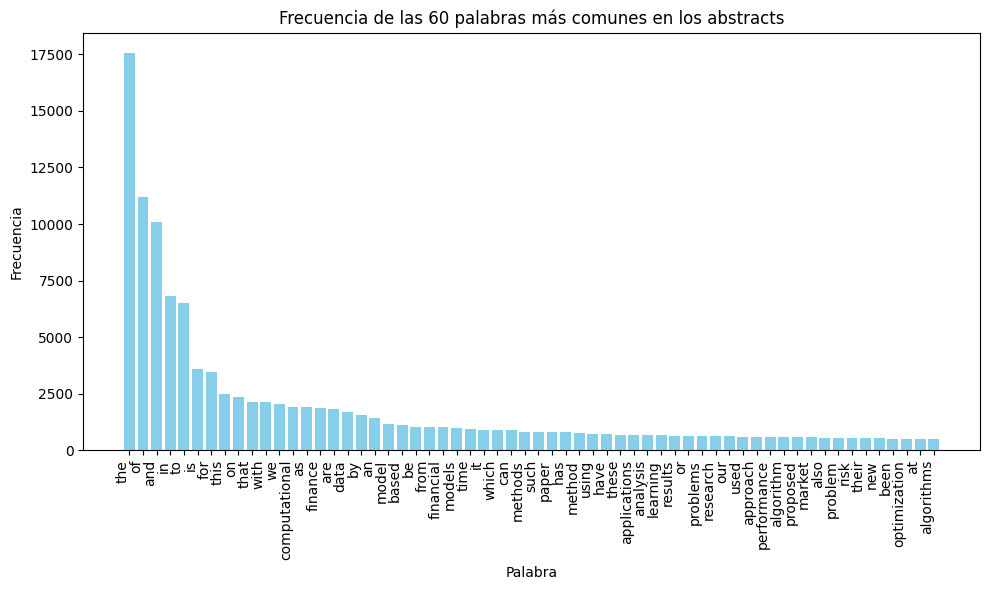

In [7]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(palabras_mas_comunes, frecuencias, color='skyblue')

# Añadir título y etiquetas
plt.title('Frecuencia de las 60 palabras más comunes en los abstracts')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()